<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/01.E0-Excercicio-Limpeza-de-dados">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Preparação da base de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Limpeza de dados

Nesta lista de exercícios, você será deverá aplicar técnicas de processamento de dados e limpeza de dados para lidar com problemas comuns encontrados em conjuntos de dados do mundo real. Aplique as técnicas aprendidas na disciplina de Mineração de Dados para tratar dados faltantes e inconsistências, tornando os dados prontos para análises subsequentes.

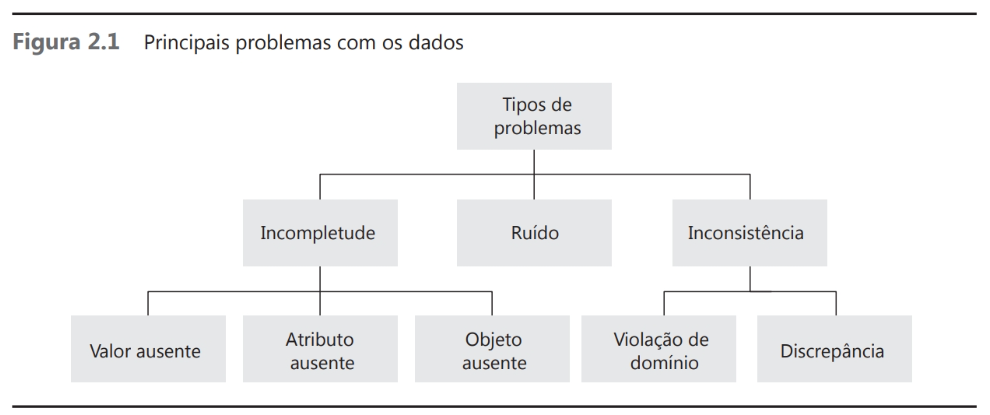

Para este exercícios será utilizada a base de dados [Food choices: College students' food and cooking preferences](https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv) que contém informações sobre hábitos alimentares de um conjunto de estudantes. 


Este conjunto de dados possui valores ausentes em várias colunas. Sua tarefa é:

1. Identificar todas as colunas com dados faltantes.
1. Escolher a estratégia apropriada para tratar cada tipo de dado faltante (exemplo: preenchimento com média, mediana, valor mais frequente, ou remoção de linhas com dados faltantes).
1. Identificar as inconsistências específicas no conjunto de dados, como valores fora do intervalo.
1. Desenvolver um plano de ação para lidar com cada tipo de inconsistência (por exemplo, remoção de registros, correção de valores, ou imputação).
1. Aplicar as estratégias e o plano de ação escolhidos para preencher ou remover os dados faltantes e limpar os dados inconsistentes.
1. Documentar as ações tomadas em cada etapa do processo e justificar suas decisões.

**Todos os problemas** no conjunto precisam ser detectados e as ações tomadas devidamente justificadas e documentadas neste `.ipynb`. As justificativas devem ser descritas em células do tipo *Markdown* e as operações/ajustes deve estar implementadas na célula de código imediatamente subsequênte. O texto deve ser linear e conciso. 

## Solução


### Carga do conjunto de dados `food_coded.csv`

In [10]:
import numpy as np 
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/She-Codes-Now/Intro-to-Data-Science-with-R/master/food_coded.csv")
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135



### (Exemplo) Ajuste do atributo `soup`:

A coluna `soup` tem um dado faltante na linha 63. O valor será preenchido com o valor mais escolhido na amostra (moda). 

In [2]:
display(df.loc[[63],'soup':])
df['soup'].fillna(df['soup'].mode()[0], inplace=True)
display(df.loc[[63],'soup':])


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,NaN,1.0,4,1165.0,690,rowing,5,2,1315,180


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,1.0,1.0,4,1165.0,690,rowing,5,2,1315,180



### Ajuste do atributo `________`:

*(Descreva o problema objetivamente e em seguida descreva a solução que será implementada. Repetir para todos os atributos com problema.)*

In [3]:
# Implementação do ajuste proposto